# Visual Data Understanding

* __Author: Satavisha Roy__
* __Email: satavisha.roy@infosys.com__
* __Date: February 14, 2019__

## Installing Relevant Packages

Here are some package relevant to this module that you may need to install from the terminal window (e.g., Anaconda's terminal) if you do not have them:

>```python
pip install weightedstats
pip install seaborn
pip install plotly
pip install ggplot
# pip install biokit
```

This data set includes 201 instances of one class and 85 instances of
     another class.  The instances are described by 9 attributes, some of
     which are linear and some are nominal.

5. Number of Instances: 286

6. Number of Attributes: 9 + the class attribute

7. Attribute Information:
   1. Class: no-recurrence-events, recurrence-events
   2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
   3. menopause: lt40, ge40, premeno.
   4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44,
                  45-49, 50-54, 55-59.
   5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26,
                 27-29, 30-32, 33-35, 36-39.
   6. node-caps: yes, no.
   7. deg-malig: 1, 2, 3.
   8. breast: left, right.
  

8. Missing Attribute Values: (denoted by "?")
   Attribute #:  Number of instances with missing values:
   6.             8
   9.             1.

### The question being asked here in this EDA exercise is whether any of the variables such as age range of the patient, tumor-size, breast node (removed or not), degree of tumor malignancy explain the tumor recurrence or non-recurrence of the breast cancer patients who were part of this study

# 1 Loading Relevant Packages

Load the relevant packages:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from pandas.plotting import parallel_coordinates
from pandas.plotting import scatter_matrix
from scipy.cluster import hierarchy
import weightedstats as ws
from scipy.stats import wilcoxon
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# from biokit.viz import corrplot
# import plotly.plotly as py
# import plotly.figure_factory as ff


# 2 Get Familiar with the Data

In [2]:
data = pd.read_csv("./breast_cancer.csv")
data.tail()
# data.shape

FileNotFoundError: [Errno 2] File b'./breast_cancer.csv' does not exist: b'./breast_cancer.csv'

In [ ]:
data.info()

In [98]:
data.columns = ['tumor-size' if x=='tumor-Size' else x for x in data.columns]
data.columns


Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

### Converted most of the object variables to categorical values
### also converted the null values to 0 or -1

In [99]:
data.dtypes

class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

In [100]:
data['tumor-size'].unique()

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '14-Oct',
       '40-44', '35-39', '9-May', '45-49'], dtype=object)

In [101]:
data['tumor-size'] = data['tumor-size'].str.replace(r'14-Oct', '10-14')
data['tumor-size'] = data['tumor-size'].str.replace(r'9-May', '05-9')
data['tumor-size'].unique()

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '05-9', '45-49'], dtype=object)

In [102]:
age_list = sorted(data['age'].unique())
age_list


['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

In [103]:
data_1 = data.copy()
data_1['age'] = pd.Categorical(data_1['age'], ordered=False)
data_1['age'].dtype

CategoricalDtype(categories=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], ordered=False)

In [104]:
data_1.drop(['irradiat','menopause','inv-nodes','breast-quad'], axis=1,inplace=True)


In [105]:
data_1.shape

(286, 6)

In [106]:
data_1.columns

Index(['class', 'age', 'tumor-size', 'node-caps', 'deg-malig', 'breast'], dtype='object')

In [107]:
# data['class'] = pd.Categorical(data['class'], ordered=True)
for col in ['class', 'node-caps', 'breast']:
    data_1[col] = data_1[col].astype('category')
data_1[['class', 'node-caps', 'breast']].dtypes

class        category
node-caps    category
breast       category
dtype: object

In [108]:
data_1['age'] = pd.Categorical(data_1['age'], ordered=False)
data_1['age'].dtype


CategoricalDtype(categories=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], ordered=False)

In [109]:
data_1.shape

(286, 6)

In [110]:
data_4 = data_1.copy()


In [111]:
data_1['tumor-size'] = pd.Categorical(data_1['tumor-size'], ordered=False)
data_1['tumor-size'].dtype
# t_size = data_1['tumor-size']
# t_size.dtype

CategoricalDtype(categories=['0-4', '05-9', '10-14', '15-19', '20-24', '25-29', '30-34',
                  '35-39', '40-44', '45-49', '50-54'],
                 ordered=False)

In [112]:
data_1.shape

(286, 6)

In [113]:
data_1['age-code'] = data_1['age'].cat.codes
data_1['recur-code'] = data_1['class'].cat.codes
data_1['breast-code'] = data_1['breast'].cat.codes
data_1['class-code'] = data_1['class'].cat.codes
data_1['nodecaps-code'] = data_1['node-caps'].cat.codes
data_1['tumor-size-code'] = data_1['tumor-size'].cat.codes
data_1.drop(['breast', 'node-caps','tumor-size','age','tumor-size'], axis=1, inplace=True)
data_1.tail()
# data_1.shape

,class,deg-malig,age-code,recur-code,breast-code,class-code,nodecaps-code,tumor-size-code
281,recurrence-events,2,1,1,0,1,1,6
282,recurrence-events,3,1,1,0,1,1,4
283,recurrence-events,1,4,1,1,1,1,4
284,recurrence-events,3,2,1,0,1,1,6
285,recurrence-events,3,3,1,0,1,1,6


In [114]:
data_1.shape

(286, 8)

In [115]:
data_1.isnull().values.any()

False

In [116]:
data_1[['age-code','recur-code']].isnull().values.any()

False

In [117]:
class_df = data_1['class-code'].value_counts().to_frame()
class_df

,class-code
0,201
1,85


In [118]:
br_code_df = data_1['breast-code'].value_counts().to_frame()
br_code_df

,breast-code
0,152
1,134


In [119]:
nodes = data_1['nodecaps-code'].value_counts().to_frame().sort_index()
# data_1['nodecaps-code'] [data_1['nodecaps-code'] == 0]
# nodes = nodes.drop('nodecaps-code', axis=1,inplace=True)
nodes

,nodecaps-code
0,8
1,222
2,56


In [120]:
tumor_size = data_1['tumor-size-code'].value_counts().to_frame().sort_index()
tumor_size

,tumor-size-code
0,8
1,4
2,28
3,30
4,50
5,54
6,60
7,19
8,22
9,3


In [121]:
age_grp = data_1['age-code'].value_counts().to_frame().sort_index()
age_grp

,age-code
0,1
1,36
2,90
3,96
4,57
5,6


In [122]:
list(data_1)

['class',
 'deg-malig',
 'age-code',
 'recur-code',
 'breast-code',
 'class-code',
 'nodecaps-code',
 'tumor-size-code']

In [123]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 8 columns):
class              286 non-null category
deg-malig          286 non-null int64
age-code           286 non-null int8
recur-code         286 non-null int8
breast-code        286 non-null int8
class-code         286 non-null int8
nodecaps-code      286 non-null int8
tumor-size-code    286 non-null int8
dtypes: category(1), int64(1), int8(6)
memory usage: 4.4 KB


In [124]:
data_2 = data_1.copy()
round(data_2.describe(),2)

,deg-malig,age-code,recur-code,breast-code,class-code,nodecaps-code,tumor-size-code
count,286.00,286.00,286.00,286.00,286.00,286.00,286.00
mean,2.05,2.66,0.30,0.47,0.30,1.17,4.88
std,0.74,1.01,0.46,0.50,0.46,0.44,2.11
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,2.00,0.00,0.00,0.00,1.00,4.00
50%,2.00,3.00,0.00,0.00,0.00,1.00,5.00
75%,3.00,3.00,1.00,1.00,1.00,1.00,6.00
max,3.00,5.00,1.00,1.00,1.00,2.00,10.00


In [139]:
data_2['Deg_Malignancy'] = data_1['deg-malig']
data_2['Age'] = data_1['age-code']
data_2['Recurrence'] = data_1['recur-code']
data_2['Breast-side'] = data_1['breast-code']
data_2['Nodecaps'] = data_1['nodecaps-code']
data_2['Tumor-size'] = data_1['tumor-size-code']
# data_2 = data_2.drop(['deg-malig','age-code','recur-code','breast-code','nodecaps-code','tumor-size-code'],axis=1,inplace=True)
# data_2.head()

In [140]:
data_3 = data_2.copy()
data_3['Age'] = data_3['age-code']
data_3['Nodecaps'] = data_3['nodecaps-code']
data_3['Breast-side'] = data_3['breast-code']
data_3['Tumor-Size'] = data_3['tumor-size-code']
data_3['Deg_Malignancy'] = data_3['deg-malig']
data_3['Recurrence'] = data_3['recur-code']
data_3 = data_3.drop(['deg-malig','age-code','recur-code','breast-code','nodecaps-code','tumor-size-code', 'class-code', 'class'],axis=1)
data_3.head()

,Deg_Malignancy,Age,Recurrence,Breast-side,Nodecaps,Tumor-size,Tumor-Size
0,3,1,0,0,1,6,6
1,2,2,0,1,1,4,4
2,2,2,0,0,1,4,4
3,2,4,0,1,1,3,3
4,2,2,0,1,1,0,0


# 3 Univariate Analysis

### Descriptive stats, esp. looking at median and mode for this data

In [126]:
# plt.rcParams["figure.figsize"] = (15,7)
# plt.rcParams["xtick.labelsize"] = 12

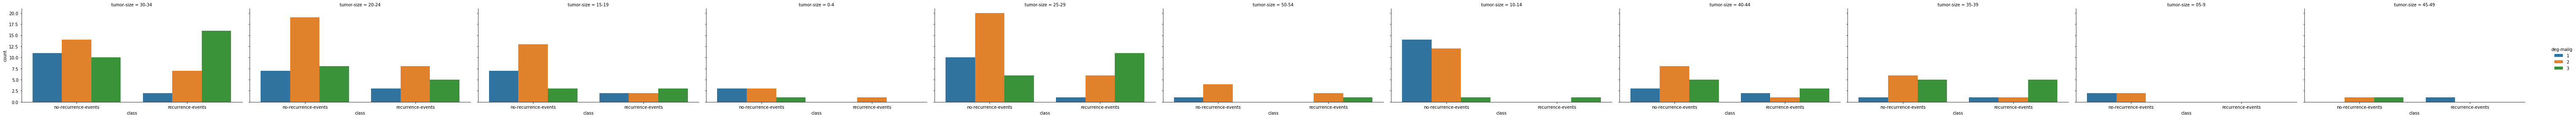

In [127]:
# data_1.boxplot('tumor-size','origin',rot = 30,figsize=(5,6))


ax = sns.catplot(x="class", hue="deg-malig", col = "tumor-size", kind= 'count', height= 4, data=data, aspect = 1.9)
# ay = sns.countplot(x="class", hue="tumor-size", data=data_1)


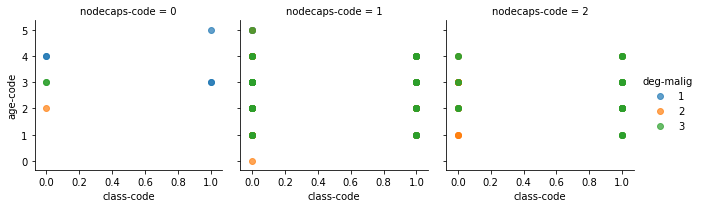

In [128]:
g = sns.FacetGrid(data_1, col="nodecaps-code", hue="deg-malig")
g.map(plt.scatter, "class-code", "age-code", alpha=.7)
g.add_legend();

### This boxplot shows that recurrence of breast cancer and degree of malignancy have a positive relationship

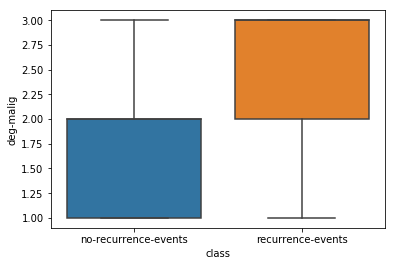

In [129]:
sns.boxplot( x=data_1["class"], y=data_1["deg-malig"] )


### There does not seem to be a correlation with age and degree of malignancy

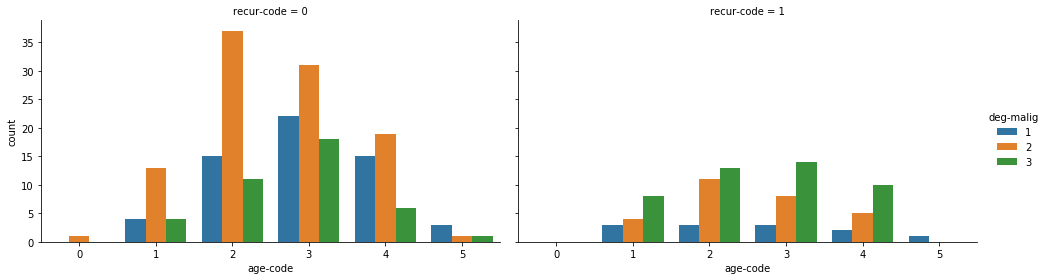

In [130]:
 g = sns.catplot(x="age-code", hue="deg-malig", col="recur-code",
...                 data=data_1, kind="count",
...                 height=4, aspect=1.7);

In [131]:
stats.describe(data_3.Recurrence.values)

DescribeResult(nobs=286, minmax=(0, 1), mean=0.2972027972027972, variance=0.20960618329039388, skewness=0.8874634947378082, kurtosis=-1.2124085455077565)

### The average breast cancer patients whose went into relapse

In [132]:
stats.trim_mean(data_3.Recurrence.value_counts(0,1),
                proportiontocut = 0.1)

C:\Users\satavisha.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


143.0

### Median of all variables

In [133]:
data_3.median()

Age               3.0
Nodecaps          1.0
Breast-side       0.0
Tumor-Size        5.0
Deg_Malignancy    2.0
Recurrence        0.0
dtype: float64

### It is interesting to note that the median of degree of malignancy is medium at 2.0 and age range is 3 which is age-range of 50-59. Also, interestingly node which was given a code of 1 if present in caps or 0 if not, is at a median of 2, so most of the patients had their nodecaps removed.Also, tumor-size median is at 5 which means the median of the actual tumor-size is 20-25 g.


## 3.2 Central Tendency: Categorical Variable

In [136]:
round(data_3.describe(),7)


,Age,Nodecaps,Breast-side,Tumor-Size,Deg_Malignancy,Recurrence
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,2.664336,1.167832,0.468531,4.881119,2.048951,0.297203
std,1.011818,0.443052,0.499883,2.105930,0.738217,0.457828
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,0.000000,4.000000,2.000000,0.000000
50%,3.000000,1.000000,0.000000,5.000000,2.000000,0.000000
75%,3.000000,1.000000,1.000000,6.000000,3.000000,1.000000
max,5.000000,2.000000,1.000000,10.000000,3.000000,1.000000


### Following is a histogram of all variables measured

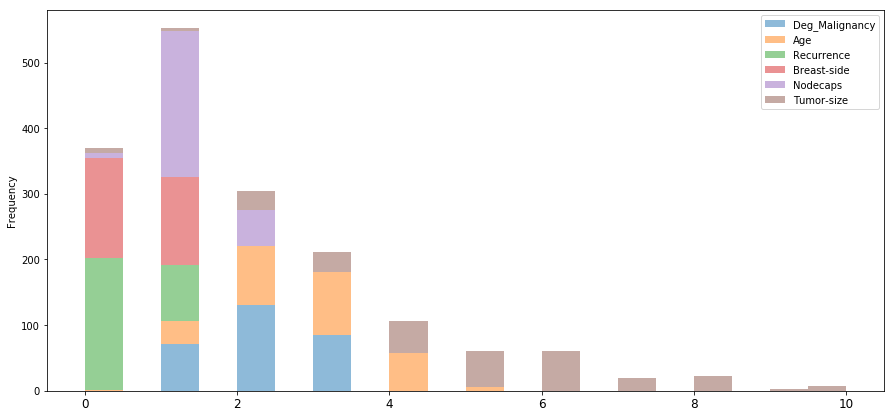

In [235]:
plt.rcParams["figure.figsize"] = (15,7)
plt.rcParams["xtick.labelsize"] = 12
data_3.plot(kind='hist', alpha=0.5, stacked=True, bins=20)

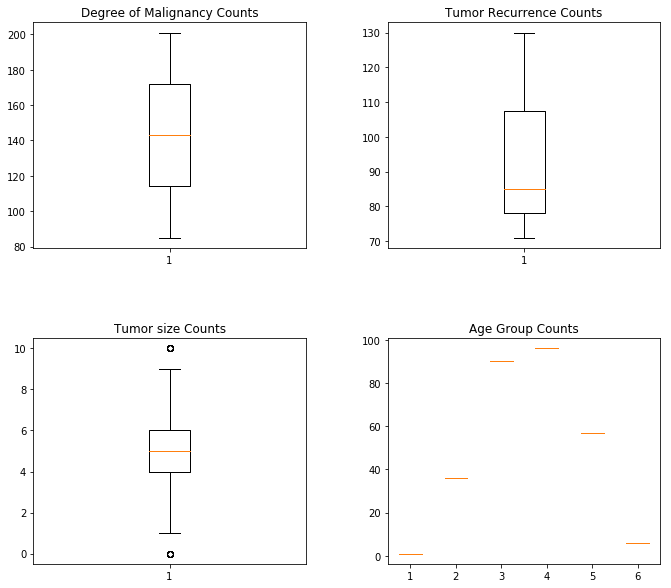

In [183]:
# fig = plt.figure()
# fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

# ax = fig.add_subplot(111)
# ax.boxplot(data_3["Deg_Malignancy"].value_counts())

# ax.set_title('axes title')
# ax.set_xlabel('xlabel')
# ax.set_ylabel('ylabel')


fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(data_3["Recurrence"].value_counts())
axs[0, 1].boxplot(data_3["Deg_Malignancy"].value_counts())
axs[1, 0].boxplot(data_3["Tumor-size"])
axs[1, 1].boxplot(age_grp)
axs[0, 1].set_title('Tumor Recurrence Counts')
axs[0, 0].set_title('Degree of Malignancy Counts')
axs[1, 0].set_title('Tumor size Counts')
axs[1, 1].set_title('Age Group Counts')
fig.subplots_adjust(left=0.028, right=1.48, bottom=0.02, top=1.9,
                    hspace=0.4, wspace=0.3)
plt.show()

In [223]:
data_3.describe()

,Deg_Malignancy,Age,Recurrence,Breast-side,Nodecaps,Tumor-size
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,2.048951,2.664336,0.297203,0.468531,1.167832,4.881119
std,0.738217,1.011818,0.457828,0.499883,0.443052,2.105930
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,1.000000,4.000000
50%,2.000000,3.000000,0.000000,0.000000,1.000000,5.000000
75%,3.000000,3.000000,1.000000,1.000000,1.000000,6.000000
max,3.000000,5.000000,1.000000,1.000000,2.000000,10.000000


### This bar plot shows the tumor size counts. #6 is the ordinal code for tumor-size of 30-34g, the most frequent size (mode). #9 is tumor-size of 45-49g and is the min. count

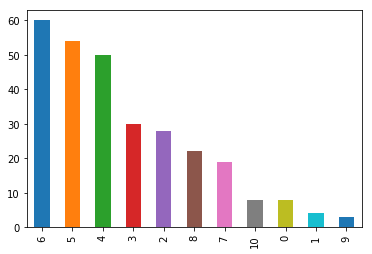

In [224]:
data_1['tumor-size-code'].value_counts().plot(kind='bar')


### This pie chart gives a proportion of patients who went into relapse after breast cancer surgery as well as those who did not in the 5 years following treatment. Roughly 1/3rd of the patients went into relapse

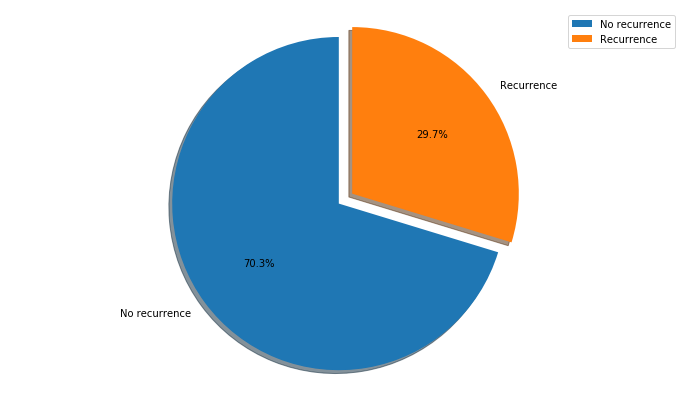

In [225]:
# plt.pie(data_1, labels = data_1.columns)
# plt.show()
explode = (0.1, 0)
fig, ax = plt.subplots(figsize=(12,7))
ax.pie(data_3['Recurrence'].value_counts(),explode=explode, labels=['No recurrence', 'Recurrence'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
#plt.tight_layout()
plt.legend()
plt.show()

## 3.3 Measures of Variability: Quantitative Variable

 - `np.var(x)`: _Variance_: the average distance from the mean
 - `np.std(x)`: _Standard deviation_: sqrt(variance) or the average spread around the mean
 - `stats.iqr(x)`: _Interquartile range_: the difference between the 75th percentile and the 25th percentile of the sorted data values
 - `pd.mad()`: _Median absolute deivation_: the median of the absolute value of the deviations from the mean median(abs(x - mean(x)))
 - `pd.quantile()`: Quantile of the data

In [226]:
np.std(data_3.Recurrence)

0.45702657968397226

In [227]:
stats.iqr(data_3[['Recurrence', 'Deg_Malignancy', 'Age']])

2.0

In [228]:
data_3.mad()

Deg_Malignancy    0.565309
Age               0.855739
Recurrence        0.417747
Breast-side       0.498019
Nodecaps          0.325884
Tumor-size        1.648491
dtype: float64

In [162]:
data_3['Age'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.0
0.25    2.0
0.50    3.0
0.75    3.0
0.95    4.0
Name: Age, dtype: float64

In [163]:
sorted(data['age'].unique())

['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

### Note that standard deviation is almost 1.5 times as large as the MAD. This is not surprizing since the standard deviation is sensitive to outliers. There is quite a bit of variability among the age groups: the 5th percentile has only the age group 20-29 and the 95th percentile is Group 4 which is 50-59.

## 3.4 Exploring Data Distribution

A ___boxplot___ is based on percentiles and gives a quick way to visualize the distribution of data. In a boxplot, the top and bottom of the box are at the 75th and 25th percentiles, respectively.

A ___histogram___ is a way to visualize a frequency table, with bins on the $x$-axis and data count on the $y$-axis.

### This density plot shows clearly that about 1/3rd patients went into relapse

### The age range histogram indicates that the data is normally distributed

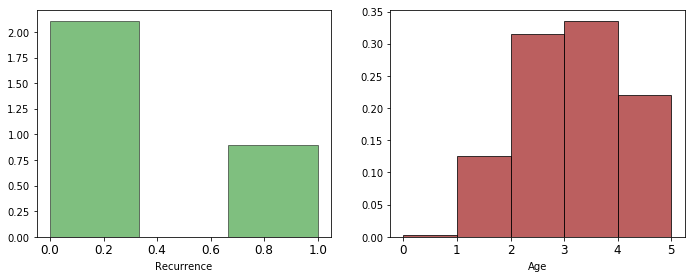

In [386]:
fig, axs = plt.subplots(1,2)
axs[0].hist(data_3.Recurrence,3,
         density=1, 
         facecolor='green', 
         alpha=0.5,
         edgecolor='black')
axs[0].set_xlabel('Recurrence')
axs[1].set_xlabel('Age')
axs[1].hist(data_3.Age, 5,
         density=1, 
         facecolor='brown', 
         alpha=0.75,
         edgecolor='black')

fig.subplots_adjust(left=0.4, right=1.0, bottom=0.05, top=0.5, hspace=0.3, wspace=0.2)
plt.show()

node_grp = data.groupby("class") ["node-caps"] 
node_grp
ax.legend()

### This age range frequency bar plot makes it clear that the data is normally distributed

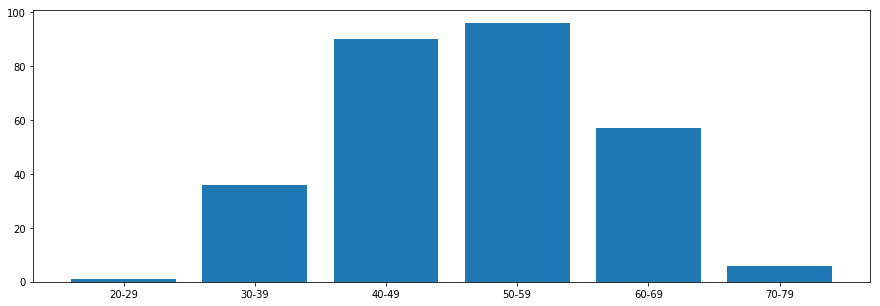

In [170]:
plt.figure(figsize=(15,5))
new_val = data_4.groupby("age")['class'].count()
new_val
new_val = pd.DataFrame({'age':new_val.index, 'Count':new_val.values})

plt.bar([0,1,2,3,4,5],new_val.Count)
plt.xticks([0,1,2,3,4,5], new_val[new_val.columns[0]])
plt.show()


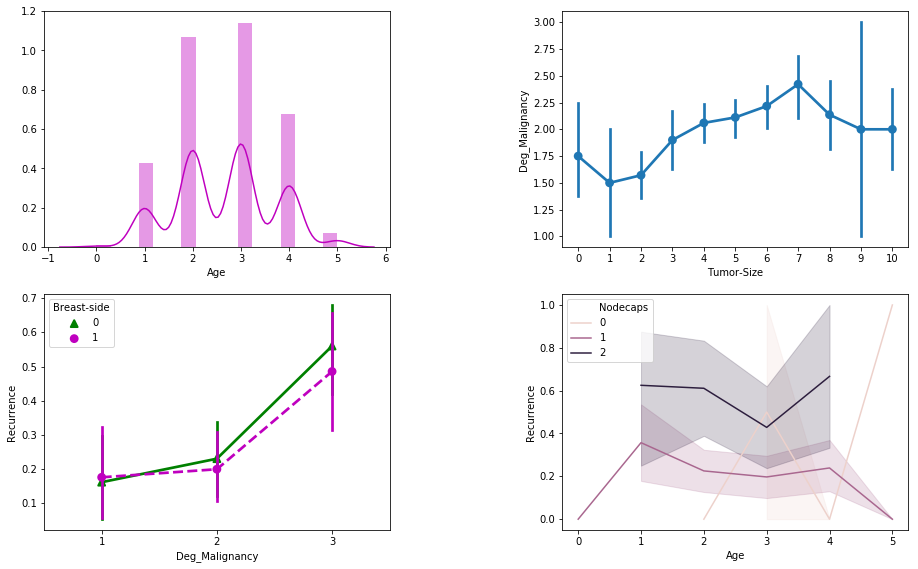

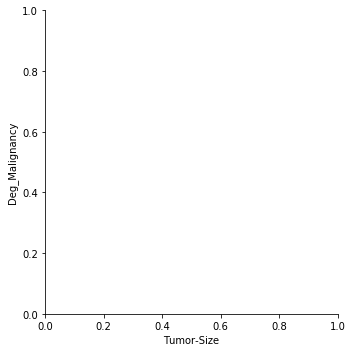

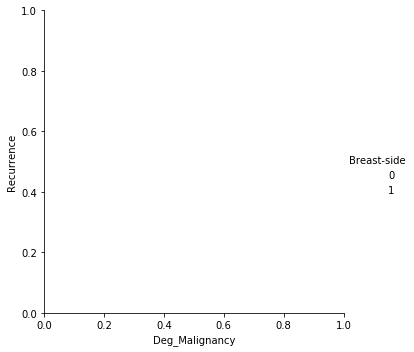

In [92]:
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=False)
# sns.despine(left=True)
# sns.hist
sns.distplot(data_3["Age"], color="m", ax=axes[0, 0])
sns.catplot(x="Tumor-Size", y="Deg_Malignancy", kind="point", data=data_3, order=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ax=axes[0,1]);
sns.catplot(x="Deg_Malignancy", y="Recurrence", hue="Breast-side", palette={0: "g", 1: "m"}, markers=["^", "o"], linestyles=["-", "--"],kind="point", data=data_3, ax=axes[1,0])
sns.lineplot(x='Age', y='Recurrence', data=data_3, hue='Nodecaps', ax=axes[1,1])
f.subplots_adjust(left=0.4, right=1.9, bottom=0.1, top=1.0, hspace=0.2, wspace=0.5)
plt.show()

A ___density plot___ is a smoothed version of a histogram:

### Clearly, degree of malignancy of 2 seems to more in common among patients

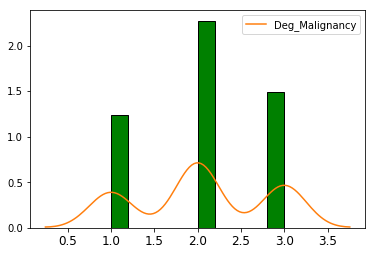

In [1062]:
plt.hist(data_3.Deg_Malignancy,
         facecolor='green',
         density=True,
         edgecolor='black')

fig=sns.kdeplot(data_3['Deg_Malignancy'], legend=True)
plt.show()

# 4 Bivariate: Correlation and Scatterplot Matrices

## 4.1 Correlation Matrix

___Correlation___ (`.corr(x, y)`) is a metric that measures the extent to which two numeric variables are associated with one another:

 - Positive: if $x$) increases, then $y$ increases: +1 perfect positive correlation
 - Negative: if $x$ increases, then $y$ decreases: -1 perfect negative correlation
 - Zero: no association between them
 

In [1063]:
data_3.shape

(286, 8)

In [25]:
sp500=sp500[sp500['Unnamed: 0']>'2012-07-01']
sp500.shape

(754, 518)

### Spearman Correlation test on Ordinal data

In [76]:
corr = data_3.corr(method='spearman')
corr

,Age,Nodecaps,Breast-side,Tumor-Size,Deg_Malignancy,Recurrence
Age,1.000000,-0.081253,-0.044392,-0.028765,-0.074762,-0.069759
Nodecaps,-0.081253,1.000000,0.019682,0.199015,0.329976,0.246113
Breast-side,-0.044392,0.019682,1.000000,0.032991,-0.054081,-0.058646
Tumor-Size,-0.028765,0.199015,0.032991,1.000000,0.236712,0.181704
Deg_Malignancy,-0.074762,0.329976,-0.054081,0.236712,1.000000,0.302621
Recurrence,-0.069759,0.246113,-0.058646,0.181704,0.302621,1.000000


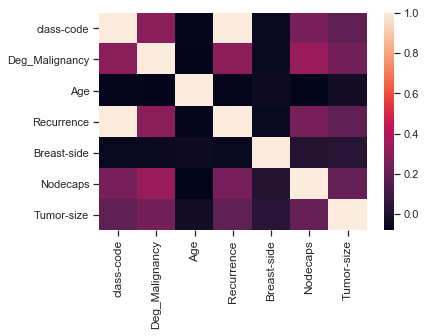

In [1178]:
# plot the heatmap
#plt.figure(figsize=(7,7))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

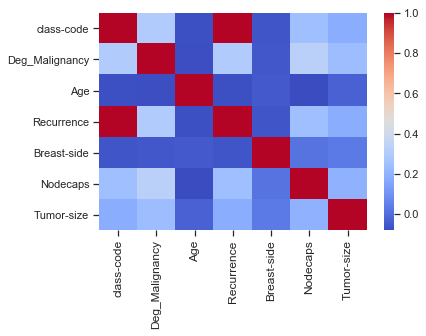

In [1179]:
# Change the color palette by using 
# the cmap parameter: https://seaborn.pydata.org/tutorial/color_palettes.html
sns.heatmap(corr, 
            cmap='coolwarm')
plt.show()

### Age, degree of malignancy, and nodecaps seem to be associated with recurrence of breast cancer. These variables may play some role in the risk of breast cancer relapse.

In [42]:
pd.DataFrame.corr?

If you wanted to be even more fancy, you can use Pandas Style (http://pandas.pydata.org/pandas-docs/stable/style.html), for example:

In [1181]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Breast Cancer Risk Factors Correlation")\
    .set_precision(2)\
    .set_table_styles(magnify())

,class-code,Deg_Malignancy,Age,Recurrence,Breast-side,Nodecaps,Tumor-size
class-code,1,0.3,-0.07,1,-0.059,0.25,0.18
Deg_Malignancy,0.3,1,-0.075,0.3,-0.054,0.33,0.24
Age,-0.07,-0.075,1,-0.07,-0.044,-0.081,-0.029
Recurrence,1,0.3,-0.07,1,-0.059,0.25,0.18
Breast-side,-0.059,-0.054,-0.044,-0.059,1,0.02,0.033
Nodecaps,0.25,0.33,-0.081,0.25,0.02,1,0.2
Tumor-size,0.18,0.24,-0.029,0.18,0.033,0.2,1


## 4.2 Scatterplot Matrix for Predictor Variables

In [24]:
sp500.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


### Scatterplot representation though rigorous, may not be able to provide useful information when working with ordinal and binary values as shown below. 

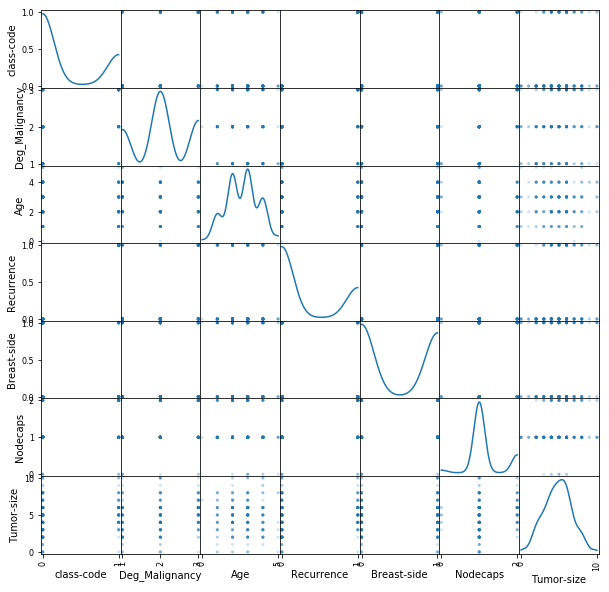

In [1067]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_3, alpha=0.2, 
               figsize=(10, 10), 
               diagonal='kde')
plt.show()

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [81]:
sns.pairplot?

C:\Users\satavisha.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


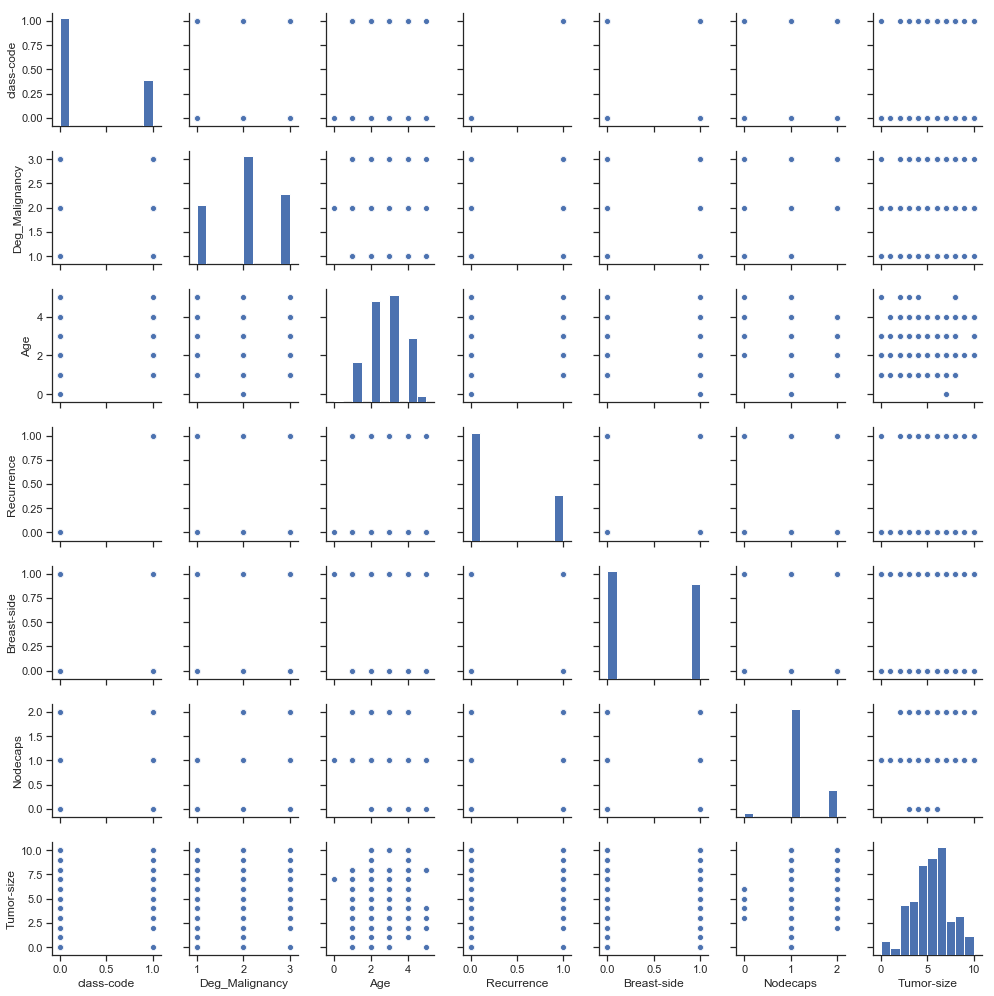

In [1068]:
# import seaborn as sns
sns.set(style="ticks", color_codes=True)

# iris = sns.load_dataset("iris")
g = sns.pairplot(data_3, 
                 size=2.0)

In [71]:
scatter_matrix?

## 4.3 Scatterplot Matrix for Predictor Variables and a Response Variable

For scatterplot matrices, it is often insightful to see the pair-wise relationships between numeric predictors within each group/class of the response variable (note `hue=` followed by the response variable `species`). This way a relationship between two predictor variables and one response variable is being captured:

### This scatterplot seems to suggest there is some association with degree of malignancy and age as well as tumor size and breast node caps. These need to be observed further

In [7]:
sns.pairplot?

C:\Users\satavisha.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


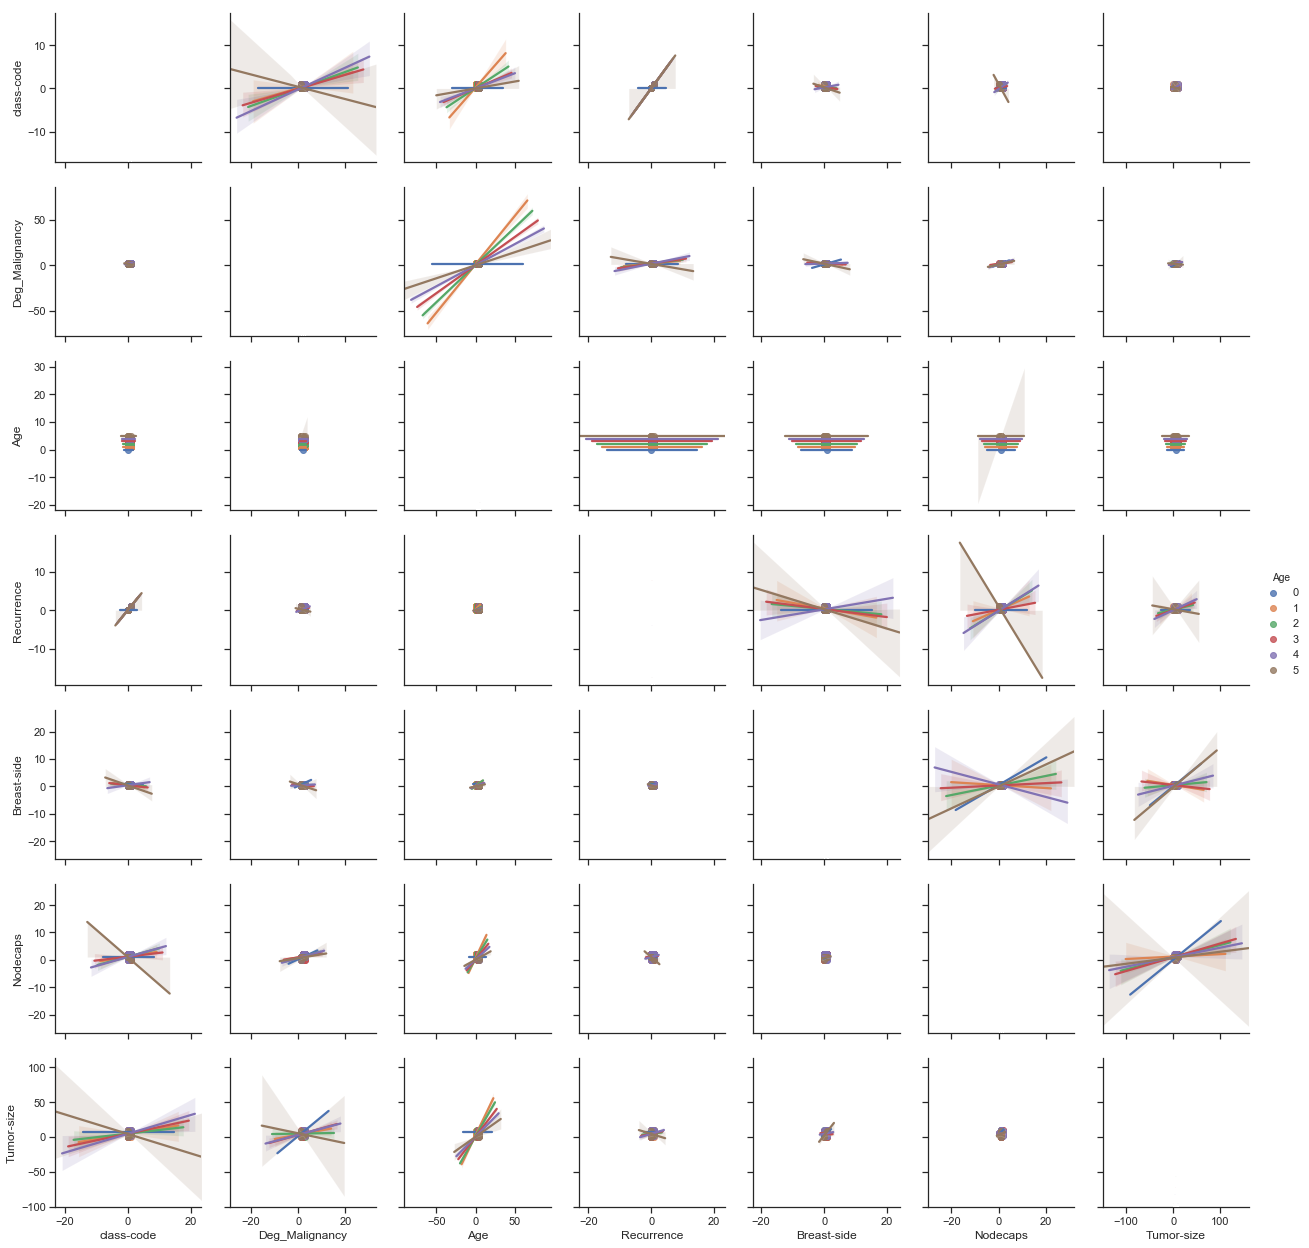

In [1069]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

sns.pairplot(data_3,
             diag_kind='hist',
             hue="Age",
             kind="reg")
plt.show()

## 4.4 Hexagonal Binning for Quantitative Variables

In [ ]:
# https://matplotlib.org/gallery/statistics/hexbin_demo.html

Scatterplots are fine for small sample sizes. Otherwise, they will be too dense to visualize the relationships. A ___hexagon binning___ plot addresses this issue, as illustrated on the `kc_tax` data that contains values for residential properties in King County, Washington:

### Hexagonal binning may not be too useful for plotting ordinal data as shown....

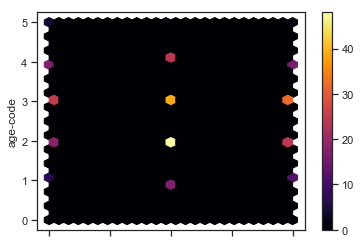

In [1193]:
data_1.plot.hexbin(x='deg-malig', 
                   y='',
                   gridsize = 25,
                   cmap='inferno')
# plt.xlabel('Finished Square Feet')
plt.show()

### The following plot shows that tumor-size may play a role in recuurence of breast cancer. The larger the size of the tumor the larger the risk of cancer recurrence

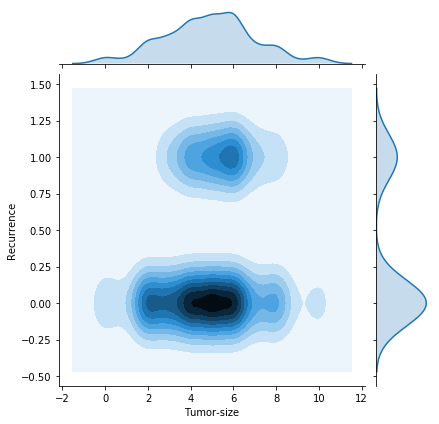

In [174]:
sns.jointplot(x="Tumor-size", y="Recurrence", data=data_3, kind="kde");

## 4.5 Correlation Plots

In [1117]:
data_3_corr_matrix = data_3.corr()
data_3_corr_matrix.head()

,class-code,Deg_Malignancy,Age,Recurrence,Breast-side,Nodecaps,Tumor-size
class-code,1.000000,0.299400,-0.071719,1.000000,-0.058646,0.237577,0.175065
Deg_Malignancy,0.299400,1.000000,-0.085968,0.299400,-0.052861,0.328815,0.218169
Age,-0.071719,-0.085968,1.000000,-0.071719,-0.041769,-0.093049,-0.010559
Recurrence,1.000000,0.299400,-0.071719,1.000000,-0.058646,0.237577,0.175065
Breast-side,-0.058646,-0.052861,-0.041769,-0.058646,1.000000,0.023930,0.049763


In [1194]:
# from biokit.viz import corrplot
# c = corrplot.Corrplot(data_3_corr_matrix)
# c.plot()

### Correlation: Statistical Significance 

In [1198]:
import seaborn as sns
# df = sns.load_dataset("iris")

from scipy import stats 

spearman_coef, p_value = stats.spearmanr(data_3["Deg_Malignancy"], 
                                       data_3["Recurrence"]) 
print("Spearman Correlation Coefficient: ", spearman_coef, 
      "\nand a P-value of:", p_value) 

Spearman Correlation Coefficient:  0.30262112976529915 
and a P-value of: 1.8063194724130684e-07


### Here, the Spearman correlation implies that there is a relationship between deg of malignancy and recurrence of breast cancer.

In [ ]:
spearman_coef, p_value = stats.spearmanr(data_3["Nodecaps"], 
                                       data_3["Recurrence"]) 
print("Spearman Correlation Coefficient: ", spearman_coef, 
      "\nand a P-value of:", p_value) 

### Here, the Spearman correlation computed informs that there is a relationship between breast nodes and recurrence of breast cancer after treatment which is interesting.

In [ ]:
sns.boxplot( x=data_1["recur-code"], y=data_1["deg-malig"] )


# 5 Bivariate: Compare Quantitaive Variable against Categorical Variable

 - A _Violin_ plot: plots the density estimate with the density on the $y$-axis and the categorical variable on the $x$-axis
 - Density is mirrored and flipped: hence, $violin$
 - Pros: Unlike boxplots, they can show nuances in the distribution
 - Cons: Boxplot more clearly shows outliers

C:\Users\satavisha.roy\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


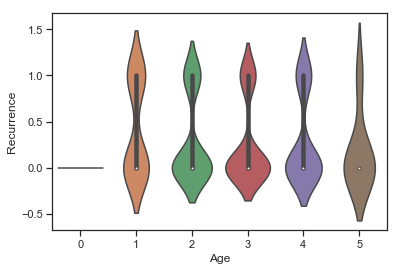

In [1115]:
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
# http://seaborn.pydata.org/examples/grouped_violinplots.html
# https://python-graph-gallery.com/violin-plot/
sns.violinplot(x="Age", 
               y="Recurrence", 
               data=data_3)
plt.show()

### Higher the age range the more risk of undergoing relapse of breast cancer. The distribution is left-skewed for the particular age group.

## 5.2 Boxplot

### The box plot of age-range vs degree of malignancy reflects that for all age ranges from 30-39, 40-49, 50-59 and 60-69, bulk of the patients have degree of malignancy between 2 and 3, Curiously, for the last age range of 70-79, the degree of malignancy was found to be between 1 and 2

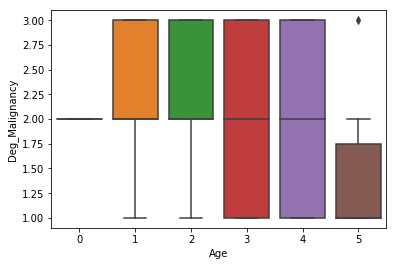

In [193]:
sns.boxplot(x="Age", y="Deg_Malignancy", data=data_3)
plt.show()

# 6 Multivariate: Visual Exploration of Multiple Variables

##  Parallel Coordinates Plot

The ___parallel coordinates___ plot is useful for creating the profiles for different clusters or groups of the data, as they allow for visual summeries of how observations within the same groups are similar across multiple variables, as well as how they are different from other group observations:

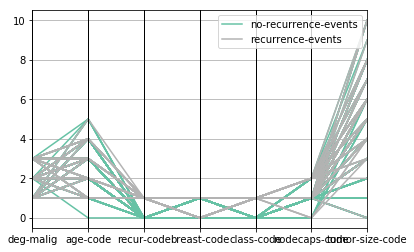

In [194]:
# http://benalexkeen.com/parallel-coordinates-in-matplotlib/
# https://python-graph-gallery.com/150-parallel-plot-with-pandas/
from pandas.plotting import parallel_coordinates
parallel_coordinates(data_1, 'class',
                    colormap=plt.get_cmap("Set2"))
plt.show()

### The parallel coordinates plot shows greater variability in tumor-size, nodecaps as well as degree of malignancy to a lesser extent which could be possible candidates of determinants of higher recurrence of breast cancer

## 6.3 Cluster Dendrogram: Hierarchical Relationships

___Cluster Dendrogram___ is a hierarchical tree-like relationship among multiple variables or observations: the closer to the bottom of the tree, the more similar or correlated they are:



Text(0.5, 1.0, 'Dendrogram of the Variables')

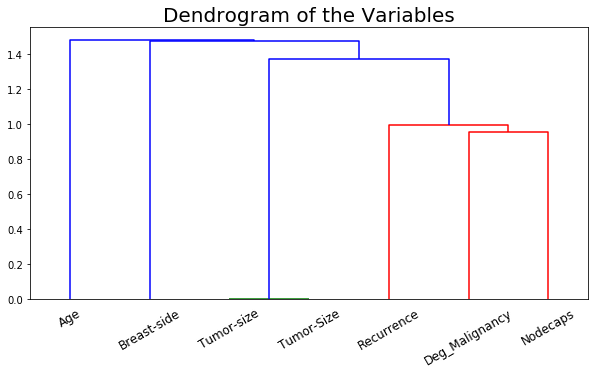

In [195]:
#https://python-graph-gallery.com/dendrogram/
# data_4 = sns.load_dataset(data_3)
# plt.figure(figsize=(7,7), rotation=30)
data_4=data_3.corr()
Z = hierarchy.linkage(data_4, 'single')
plt.figure(figsize = (10,5))
dn = hierarchy.dendrogram(Z,labels=data_4.columns)
ax = plt.gca()
plt.xticks(rotation=30)
ax.set_title('Dendrogram of the Variables', fontsize=20)

### This cluster dendrogram also shows that there is high correlation between nodecaps and degree of malignancy as they are closest at the bottom. Next is tumor-size. Surprisingly, age is the least correlated as can be seen from the distance from recurrence of breast cancer node